In [26]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

# Step 1: Load Dataset
df = pd.read_csv('/content/loan_prediction.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Shape: (614, 13)
Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<Axes: >

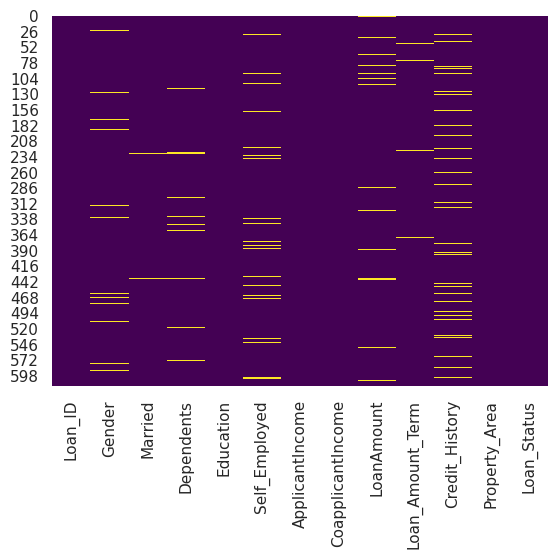

In [27]:
# Load Dataset
df = pd.read_csv('/content/loan_prediction.csv')
print("Dataset Shape:", df.shape)
df.head()
# Checking For Null Values
print("Missing values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


In [28]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object or category dtype)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Initialize label encoders dictionary
label_encoders = {}

# Apply label encoding only to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop the first column (loan id) as it is not useful for prediction
df.drop(df.columns[0], axis=1, inplace=True)

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
# Step 3: Handling Null Values (Fill or Drop)
# You can choose strategies like filling with mode/mean or dropping

# Filling categorical nulls with mode
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Filling numeric nulls with median
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Re-checking nulls
df.isnull().sum()


/tmp/ipython-input-29-2867083271.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [106]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [108]:
#selecting best features
from sklearn.feature_selection import SelectKBest , f_regression

selector = SelectKBest(score_func=f_regression, k=8)
x_new = selector.fit_transform(X, y)

mask= selector.get_support()
selected_feature = X.columns[mask]
print(selected_feature)
df[selected_feature]

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'LoanAmount', 'Property_Area'],
      dtype='object')


,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Property_Area
0,1,0,0,0,0,0.0,128.0,2
1,1,1,1,0,0,1508.0,128.0,0
2,1,1,0,0,1,0.0,66.0,2
3,1,1,0,1,0,2358.0,120.0,2
4,1,0,0,0,0,0.0,141.0,2
...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,1950.0,108.0,0
609,0,0,0,0,0,0.0,71.0,0
610,1,1,3,0,0,0.0,40.0,0
611,1,1,1,0,0,240.0,253.0,2


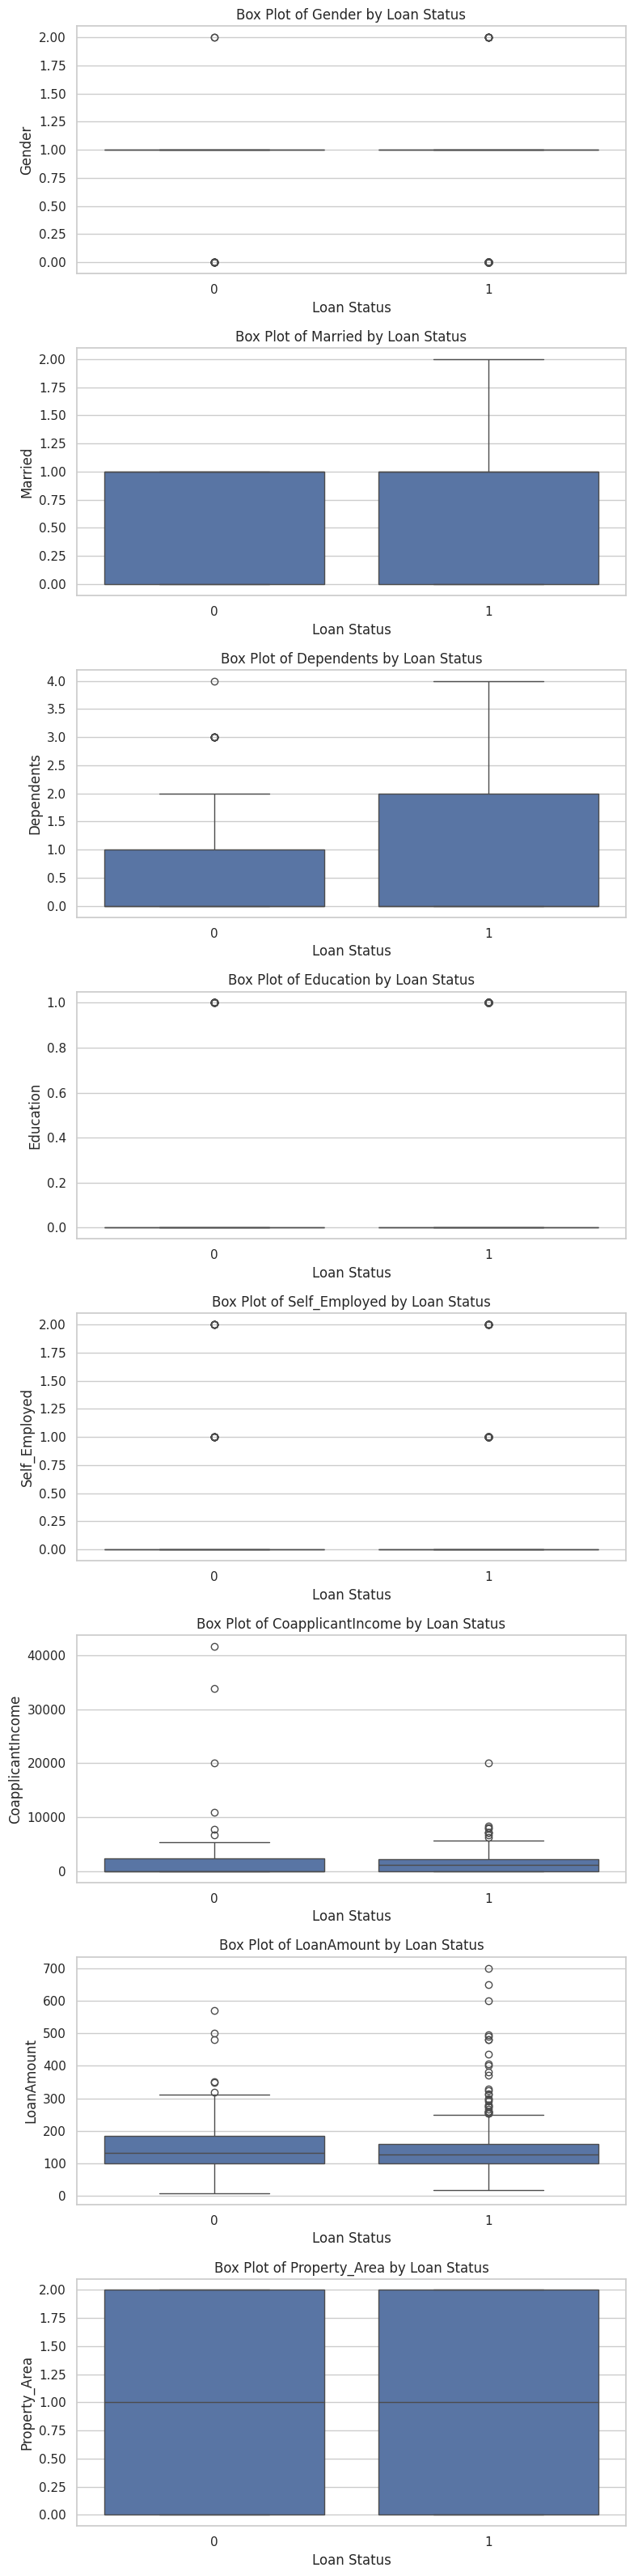

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

n_features = len(selected_feature)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))  # Adjust figsize as needed

for i, col in enumerate(selected_feature):
    ax = axes[i] if n_features > 1 else axes
    sns.boxplot(x=df['Loan_Status'], y=df[col], ax=ax)
    ax.set_title(f'Box Plot of {col} by Loan Status')
    ax.set_xlabel('Loan Status')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


In [110]:
#correcting outliers
for col in selected_feature:

  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1

  lower= q1-1.5*iqr
  upper= q3+1.5*iqr

df=df[(df[col]>=lower) & (df[col]<=upper)]

df[selected_feature]

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Property_Area
0,1,0,0,0,0,0.0,128.0,2
1,1,1,1,0,0,1508.0,128.0,0
2,1,1,0,0,1,0.0,66.0,2
3,1,1,0,1,0,2358.0,120.0,2
4,1,0,0,0,0,0.0,141.0,2
...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,1950.0,108.0,0
609,0,0,0,0,0,0.0,71.0,0
610,1,1,3,0,0,0.0,40.0,0
611,1,1,1,0,0,240.0,253.0,2


Before SMOTE: Loan_Status
1    415
0    110
Name: count, dtype: int64
After SMOTE: Loan_Status
1    415
0    415
Name: count, dtype: int64


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


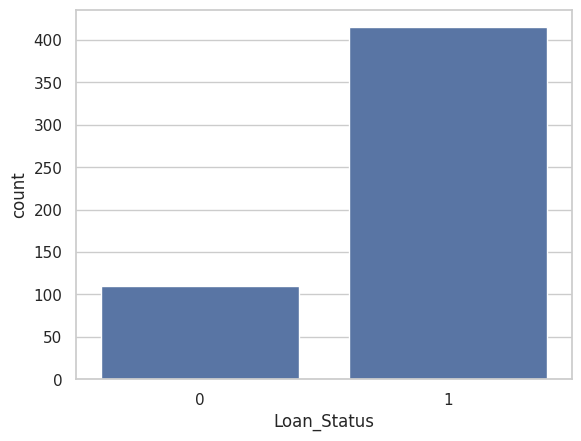

In [111]:
# Step 5: Balancing The Dataset (If Target is Imbalanced)
# Let’s assume target column is 'Loan_Status'
sns.countplot(x='Loan_Status', data=df)

# Apply SMOTE only if binary classification and imbalance exists
X = df[selected_feature]
y = df['Loan_Status']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())
df.isnull().sum()

In [112]:
df_new= pd.DataFrame(X_resampled)
df_new['Loan_Status']= y_resampled
df_new.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
CoapplicantIncome,0
LoanAmount,0
Property_Area,0
Loan_Status,0


In [113]:
x= df_new[selected_feature]
y= df_new['Loan_Status']


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
#parameter selection
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth":np.arange(3,20)
}
model = DecisionTreeClassifier()
grid_search_dctree = GridSearchCV( model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_dctree.fit(x_train, y_train)
print(f"Best hyperparameters found by Grid Search: {grid_search_dctree.best_params_}")
model_opt = grid_search_dctree.best_estimator_
y_predict = model_opt.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Fitting 5 folds for each of 34 candidates, totalling 170 fits
Best hyperparameters found by Grid Search: {'criterion': 'gini', 'max_depth': np.int64(13)}
Accuracy: 0.7289156626506024


In [116]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7289156626506024


In [40]:
conf_matrix= confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[57 34]
 [24 51]]


In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66        91
           1       0.60      0.68      0.64        75

    accuracy                           0.65       166
   macro avg       0.65      0.65      0.65       166
weighted avg       0.66      0.65      0.65       166



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# random forest classifier
df1= pd.read_csv("/content/loan_prediction.csv")



# Step 4: Handling Categorical Values using Label Encoding
label_encoders = {}
for col in df1.columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

#filling null values
num_cols = df1.select_dtypes(include=np.number).columns

for col in num_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

#dividing into x and y
x = df1.drop('Loan_Status',axis=1)
x = x.drop('Loan_ID', axis=1)
y= df1["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#model making
single_tree= DecisionTreeClassifier(max_depth=5 , random_state=42)
single_tree.fit(x_train,y_train)


single_tree_predict= single_tree.predict(x_test)

accuracy_singletree= accuracy_score(y_test,single_tree_predict)
print(f"Accuracy: {accuracy_singletree}")
print(classification_report(y_test,single_tree_predict))



Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



/tmp/ipython-input-43-4034962579.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [45]:
param_grid = {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'max_depth':np.arange(0,21)
    }

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    scoring='accuracy',  # Or 'roc_auc' for ROC-AUC
    verbose=2
)

grid_search.fit(x_train, y_train)

print(f"Best hyperparameters found by Grid Search: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)
best_rf_model = grid_search.best_estimator_


# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

accuracy_randomforest = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_randomforest}")

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best hyperparameters found by Grid Search: {'criterion': 'gini', 'max_depth': np.int64(1), 'n_estimators': 50}
Accuracy: 0.7886178861788617


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

In [ ]:
best_rf_model = grid_search.best_estimator_


# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

accuracy_randomforest = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(f1_score)

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df2= pd.read_csv("/content/loan_prediction.csv")

# Step 4: Handling Categorical Values using Label Encoding
label_encoders = {}
for col in df2.columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

#filling null values
num_cols = df2.select_dtypes(include=np.number).columns

for col in num_cols:
    df2[col].fillna(df2[col].median(), inplace=True)


x = df2.drop('Loan_ID',axis=1)
x = x.drop('Loan_Status' , axis=1)
y = df2['Loan_Status']
x

In [ ]:
#split data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
#parameter selection

param_grid = {
    'n_neighbors': np.arange(1, 11),           # Number of neighbors to try
    'weights': ['uniform', 'distance'],        # Weight function used in prediction
    'p': [1, 2]                                # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
}

model_knn = KNeighborsClassifier()
grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters found by Grid Search: {grid_search.best_params_}")

model_knn_best= grid_search.best_estimator_
model_knn_best.fit(X_train_scaled, y_train)
y_pred = model_knn_best.predict(X_test_scaled) # Use scaled data for prediction

In [ ]:
#Evaluate Model
y_pred = model_knn_best.predict(X_test_scaled) # Use scaled data for prediction

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best hyperparameters found by Grid Search: {grid_search.best_params_}")
print(f"Classification Accuracy Score: {accuracy:.2f}")
print("Classification Report:\n", report)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
#xgboost

import numpy as np
from xgboost import XGBClassifier

df2= pd.read_csv("/content/loan_prediction.csv")

# Step 4: Handling Categorical Values using Label Encoding
label_encoders = {}
for col in df2.columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

#filling null values
num_cols = df2.select_dtypes(include=np.number).columns

for col in num_cols:
    df2[col].fillna(df2[col].median(), inplace=True)


x = df2.drop('Loan_ID',axis=1)
x = x.drop('Loan_Status' , axis=1)
y = df2['Loan_Status']

In [ ]:
#split data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


param_grid = {
    'learning_rate': [0.5,0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 200]}


model = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',   # Or 'accuracy', 'f1', etc.
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=1
)

grid_search.fit(x_train, y_train)
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_xgb = best_model.predict(x_test)

In [ ]:
# Evaluate
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_xgb = best_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost (n_estimators=100, learning_rate=0.1) Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
print("confussion matrix\n",confusion_matrix(y_test,y_pred_xgb))